In [75]:
import numpy as np
import matplotlib.pyplot as plt

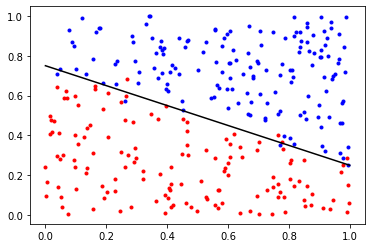

In [76]:
def datagen(n,sigma):
    x = np.random.rand(2,n)
    D = (x[1] + 0.5*x[0] - 0.75)/0.5
    Label = np.where(D > 0 , 1, 0)
    r = np.exp(-(D*D)/(2*(sigma**2)))
    z = np.random.binomial(1,r/2,size=n)
    Faux = np.where(z==1,1,0)
    Label = np.where(z==1,1-Label,Label)
    L1 = (x.T)[(Label==1)]
    L0 = (x.T)[(Label==0)]
    plt.plot(L0[:,0],L0[:,1],'.r')
    plt.plot(L1[:,0],L1[:,1],'.b')
    plt.plot(np.linspace(0,1,100),-0.5*np.linspace(0,1,100)+0.75,'black')
    plt.show()
    return x,Label,Faux

n = 300
X,Label,Faux = datagen(n,sigma = 0.05)

In [77]:
X_plus = np.concatenate((X,[np.ones(len(X[0]))]),axis=0)

In [78]:

def sgm(x):
  return 1 / (1 + np.exp(-x))


Theta = np.random.rand(3)
thetas=[Theta]
eta = 0.1
n_iter = 0
n_iter_max = 1000000
grad = 10
while(np.linalg.norm(grad)>1e-8 and n_iter<n_iter_max):
    pred = sgm(X_plus.T@Theta)
    err = pred - Label
    grad = X_plus@err
    Theta = Theta - eta*grad
    n_iter += 1
    thetas.append(Theta)

thetas = np.array(thetas)
print('Theta = ' + str(Theta))
print('n_iter = ' + str(n_iter))
    

Theta = [ 22.91632746  48.35033338 -35.55871985]
n_iter = 36936


In [79]:
Lab_est = (np.where(sgm(X_plus.T@Theta)>0.5,1,0).astype(int))
print(Label[:10])
print(Lab_est[:10])
Err=Label-Lab_est
print("nombre d'erreurs après estimation : " + str(len(np.nonzero(Err)[0])))
print("nombre d'er>reurs volontairement engendrées : " + str(len(np.nonzero(Faux)[0])))

[0 0 1 1 0 0 1 0 1 0]
[0 0 1 1 0 0 1 0 1 1]
nombre d'erreurs après estimation : 8
nombre d'er>reurs volontairement engendrées : 7


In [80]:
Theta2 = np.random.rand(3)
thetas2=[Theta2]
eta = 1.5

n_iter = 0
n_iter_max = 1000
g=10
while(np.linalg.norm(g)>1e-8 and n_iter<n_iter_max):
    seed = np.random.randint(1,1000000)
    r_gen = np.random.default_rng(seed)
    X_plus = r_gen.permutation(X_plus.T).T
    r_gen = np.random.default_rng(seed)
    Label = r_gen.permutation(Label)
    for i in range(n):
        pred = sgm(((X_plus.T)[i])@Theta2)
        err = pred - Label[i]
        g = (X_plus.T)[i]*err
        Theta2 = Theta2 - eta*g
    thetas2.append(Theta2)
    n_iter +=1
  
thetas2 = np.array(thetas2)  
print(Theta2)
print("n_iter = " + str(n_iter))



[ 12.9655809   25.23147545 -17.53681995]
n_iter = 14


In [81]:
def mini_batch(X_plus,Label):
    Theta2 = np.random.rand(3)
    thetas2=[Theta2]
    eta = 1.5

    n_iter = 0
    n_iter_max = 1000
    g=10
    while(np.linalg.norm(g)>1e-8 and n_iter<n_iter_max):
        seed = np.random.randint(1,1000000)
        r_gen = np.random.default_rng(seed)
        X_plus = r_gen.permutation(X_plus.T).T
        r_gen = np.random.default_rng(seed)
        Label = r_gen.permutation(Label)
        for i in range(10):
            pred = sgm(((X_plus.T)[i])@Theta2)
            err = pred - Label[i]
            g = (X_plus.T)[i]*err
            Theta2 = Theta2 - eta*g
        thetas2.append(Theta2)
        n_iter +=1
    
    thetas2 = np.array(thetas2)  
    print(Theta2)
    print("n_iter = " + str(n_iter))
    return thetas2,Theta2

thetas3,Theta3 = mini_batch(X_plus,Label)

[ 12.59903167  25.74230591 -17.62586351]
n_iter = 443


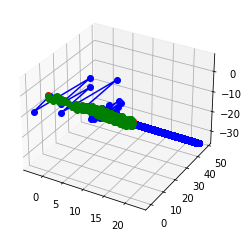

In [82]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(thetas[:,0],thetas[:,1],thetas[:,2],'-ob')
ax.plot(thetas2[:,0],thetas2[:,1],thetas2[:,2],'-or')
ax.plot(thetas3[:,0],thetas3[:,1],thetas3[:,2],'-og')
plt.draw()




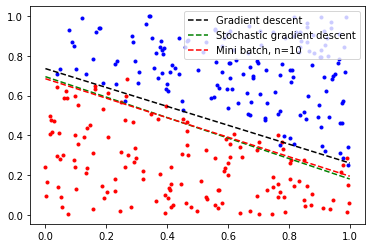

In [83]:
for i in range(len(X[0])):
    if Label[i]==0:
        plt.plot(X_plus[0,i],X_plus[1,i],'.r')
    else:
        plt.plot(X_plus[0,i],X_plus[1,i],'.b')

x1 = np.linspace(0,1.,10) 
x2 = (-Theta[2]-Theta[0]*x1)/Theta[1]
x3 = (-Theta2[2]-Theta2[0]*x1)/Theta2[1]
x4 = (-Theta3[2]-Theta3[0]*x1)/Theta3[1]
plt.plot(x1,x2,'--k',label = 'Gradient descent')
plt.plot(x1,x3,'--g',label = 'Stochastic gradient descent')
plt.plot(x1,x4,'--r',label = 'Mini batch, n=10')
plt.legend(loc='upper right')
plt.show()